In [29]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import itertools
import seaborn as sns
from keras import models
from keras import layers

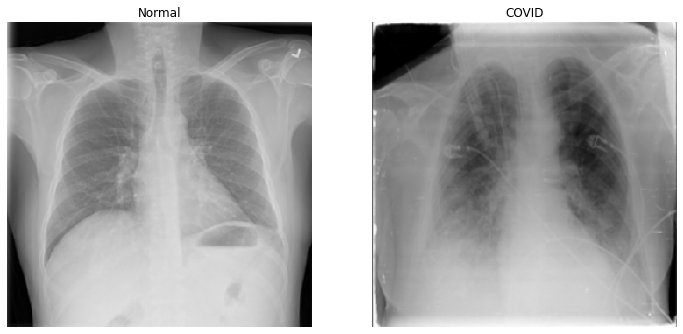

In [2]:
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize=(12,12))
ax_1 = ax[0]
img1 = load_img('data/Normal/Normal-3.png', target_size=(256,256))
ax_1.imshow(img1)
ax_1.axis('off')
ax_1.set_title('Normal')

ax_2 = ax[1]
img2 = load_img('data/COVID/COVID-3.png', target_size=(256,256))
ax_2.imshow(img2)
ax_2.axis('off')
ax_2.set_title('COVID')
plt.show()

## Image Data Generator

In [3]:
images = ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory = 'data',
        class_mode = 'binary',
        color_mode = 'grayscale',
        target_size = (256, 256),
        batch_size = 7232) 

Found 7232 images belonging to 2 classes.


In [4]:
images, labels = next(images)

In [5]:
pd.DataFrame(labels).value_counts()

1.0    3616
0.0    3616
dtype: int64

0.0


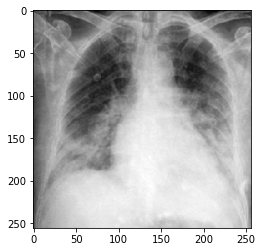

In [6]:
print(labels[2])
plt.imshow(images[2],cmap='gray')

## Train Test Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, random_state = 1)

In [8]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (5785, 256, 256, 1)
y_train shape (5785,)
x_test shape (1447, 256, 256, 1)
y_test shape (1447,)


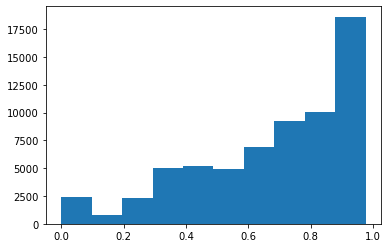

In [9]:
plt.hist(x_train[0].reshape(256*256))
plt.show()

In [10]:
x_train = x_train.reshape(5785, 256*256)
x_test = x_test.reshape(1447, 256*256)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

## Sequential Model

In [11]:
model = Sequential()
model.add(Dense(512, input_shape=(256*256,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [12]:
# compiling the sequential model
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [13]:
# Training the model
model1 = model.fit(x_train, y_train,
          batch_size=128, epochs = 10,
          verbose=2,
          validation_data=(x_test, y_test),
                  workers = -1)

Epoch 1/10
46/46 - 11s - loss: 7.6199 - accuracy: 0.5551 - val_loss: 0.5525 - val_accuracy: 0.7021 - 11s/epoch - 230ms/step
Epoch 2/10
46/46 - 9s - loss: 0.5384 - accuracy: 0.7105 - val_loss: 0.4620 - val_accuracy: 0.7650 - 9s/epoch - 193ms/step
Epoch 3/10
46/46 - 9s - loss: 0.4714 - accuracy: 0.7623 - val_loss: 0.3996 - val_accuracy: 0.8093 - 9s/epoch - 193ms/step
Epoch 4/10
46/46 - 9s - loss: 0.4346 - accuracy: 0.7803 - val_loss: 0.3691 - val_accuracy: 0.8169 - 9s/epoch - 193ms/step
Epoch 5/10
46/46 - 9s - loss: 0.4747 - accuracy: 0.7331 - val_loss: 0.4301 - val_accuracy: 0.7775 - 9s/epoch - 194ms/step
Epoch 6/10
46/46 - 9s - loss: 0.4602 - accuracy: 0.7506 - val_loss: 0.4169 - val_accuracy: 0.7588 - 9s/epoch - 197ms/step
Epoch 7/10
46/46 - 9s - loss: 0.4729 - accuracy: 0.7144 - val_loss: 0.4105 - val_accuracy: 0.7892 - 9s/epoch - 191ms/step
Epoch 8/10
46/46 - 9s - loss: 0.4549 - accuracy: 0.7523 - val_loss: 0.4109 - val_accuracy: 0.8106 - 9s/epoch - 193ms/step
Epoch 9/10
46/46 - 10s

In [14]:
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)
print('Train: ',results_train)
print('Test: ',results_test)

46/46 [==============================] - 1s 29ms/step - loss: 0.3629 - accuracy: 0.8106
Train:  [0.37259015440940857, 0.7994813919067383]
Test:  [0.36285433173179626, 0.8106427192687988]


In [19]:
cm = confusion_matrix(y_test, np.around(model.predict(x_test)).astype('int'))
cm

array([[686,  45],
       [229, 487]])

<AxesSubplot:>

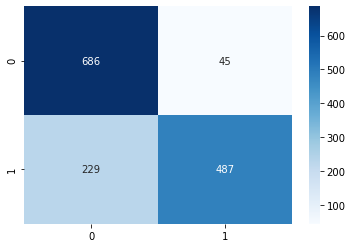

In [22]:
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')

## Convolutional Neural Network

In [24]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, random_state = 1)

In [25]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (5785, 256, 256, 1)
y_train shape (5785,)
x_test shape (1447, 256, 256, 1)
y_test shape (1447,)


In [40]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256,1)))
cnn.add(layers.MaxPooling2D((3, 3)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(16, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer = "Adam",
              metrics=['accuracy'])

In [41]:
cnn1 = cnn.fit(x_train, y_train,
                    epochs=10,
                    batch_size=50,
                    validation_data=(x_test, y_test),
                      workers = -1)

Epoch 1/10
116/116 [==============================] - 92s 785ms/step - loss: 0.5856 - accuracy: 0.7573 - val_loss: 0.3645 - val_accuracy: 0.8404
Epoch 2/10
116/116 [==============================] - 96s 817ms/step - loss: 0.2999 - accuracy: 0.8771 - val_loss: 0.2701 - val_accuracy: 0.8956
Epoch 3/10
116/116 [==============================] - 91s 781ms/step - loss: 0.2410 - accuracy: 0.9089 - val_loss: 0.2405 - val_accuracy: 0.9039
Epoch 4/10
116/116 [==============================] - 90s 775ms/step - loss: 0.1946 - accuracy: 0.9272 - val_loss: 0.2414 - val_accuracy: 0.9074
Epoch 5/10
116/116 [==============================] - 91s 787ms/step - loss: 0.1729 - accuracy: 0.9364 - val_loss: 0.2235 - val_accuracy: 0.9143
Epoch 6/10
116/116 [==============================] - 96s 828ms/step - loss: 0.1405 - accuracy: 0.9502 - val_loss: 0.2100 - val_accuracy: 0.9178
Epoch 7/10
116/116 [==============================] - 92s 795ms/step - loss: 0.1221 - accuracy: 0.9602 - val_loss: 0.2185 - val_ac

In [43]:
results_train = cnn.evaluate(x_train, y_train)
results_test = cnn.evaluate(x_test, y_test)
print('Train: ',results_train)
print('Test: ',results_test)

46/46 [==============================] - 7s 151ms/step - loss: 0.2393 - accuracy: 0.9081
Train:  [0.08526554703712463, 0.9676750302314758]
Test:  [0.23934295773506165, 0.9080857038497925]


In [44]:
cm = confusion_matrix(y_test, np.around(cnn.predict(x_test)).astype('int'))
cm

array([[705,  26],
       [107, 609]])

<AxesSubplot:>

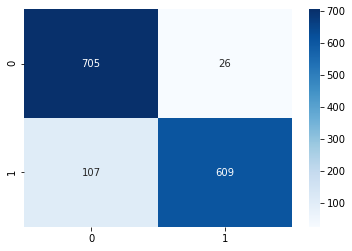

In [45]:
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')